# Метрики в задаче регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#x = np.linspace(0, 5, 500)
x = sps.uniform.rvs(0, 5, 500)
y = 0.5 * x + 1 + sps.norm.rvs(0, sqrt(0.2), x.size)

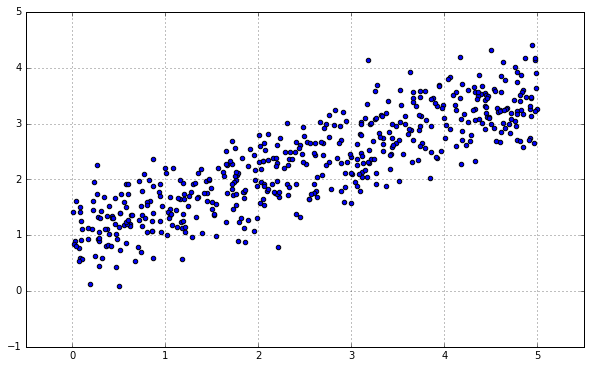

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlim(-0.5, 5.5)
plt.grid()
plt.show()

In [4]:
from sklearn import metrics
from scipy import optimize

In [15]:
res = optimize.minimize(lambda coef: metrics.mean_squared_error(y, coef[0] * x + coef[1]), [0.5, 1])

In [16]:
res.x

array([ 0.51520974,  0.97956058])

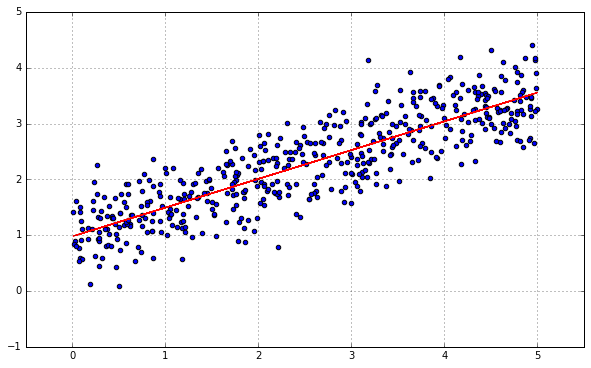

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, res.x[0] * x + res.x[1], color='r')
plt.xlim(-0.5, 5.5)
plt.grid()
plt.show()

In [14]:
x_new = np.zeros(575)
x_new[:500] = copy(x)
x_new[500:] = sps.uniform.rvs(0, 5, 75)
y_new = np.zeros(575)
y_new[:500] = copy(y)
y_new[500:] = -1 + sps.norm.rvs(0, sqrt(0.2), 75)

In [21]:
res1 = optimize.minimize(lambda coef: metrics.mean_squared_error(y_new, coef[0] * x_new + coef[1]), [0.5, 1])
res2 = optimize.minimize(lambda coef: metrics.mean_absolute_error(y_new, coef[0] * x_new + coef[1]), [0.5, 1])

In [33]:
print "MSE:", res1.x

MSE: [ 0.53360342  0.52975227]


In [34]:
print "MAE:", res2.x

MAE: [ 0.51671407  0.88294926]


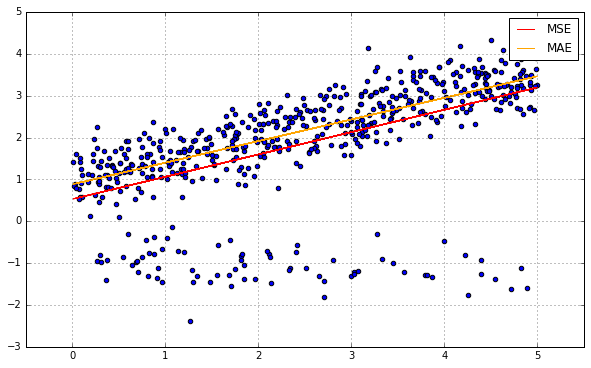

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(x_new, y_new)
plt.plot(x_new, res1.x[0] * x_new + res1.x[1], color='r', label="MSE")
plt.plot(x_new, res2.x[0] * x_new + res2.x[1], color='orange', label="MAE")
plt.legend()
plt.xlim(-0.5, 5.5)
plt.grid()
plt.show()

Из графиков видно, что MAE более устойчива к выбросам, чем MSE.